<a href="https://colab.research.google.com/github/Bastian951/ClusteringPython/blob/master/Clustering_no_jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clustering no Jerárquico**

El clustering jerárquico es bastante intuitivo y fácil de implementar. En este sentido la clase de métodos no jerárquicos son mas complejos y contra-intuitivos, ademas el número de cluster se debe elegir antes de aplicar el algoritmo. Hay dos ventajas de usar estos métodos

- No requieren matriz de distancias. Lo cual ahorra tiempo y memoria, pues para $n$ grande trabajar con una matriz de $(n \times n)$ es costoso. 
- En los métodos jerárquicos dos unidades que se separan en 2 clusters no pueden volver a ser unidas en los pasos siguientes. Por lo que los pasos dependen de los pasos anteriores. Lo cual contradice el pensamiento humano. 

## **K-means**

K-means es uno de los algoritmos no jerarquicos mas usados. Puede ser usado cuando todas las variables son cuantitativas. Elige la mejor partición de $n$ unidades en $k$ clusters.  Para definir el concepto de la mejor partición  descomponemos la suma de cuadrados ($T$) en la suma de dos terminos. La suma de cuadrados dentro del cluster ($W$) y la suma de cuadrados entre los clusters ($B$).

$$T = W+B$$

- $\displaystyle T = \sum_{i=1}^n\sum_{j=1}^{p} (x_{ij}-\bar{x}_j)^2$
- $\displaystyle W = \sum_{g=1}^k W_g$ con $\displaystyle  W_g = \sum_{i=1}^{n_g}\sum_{j=1}^p(x_{ij}-\bar{x}_{ij})^2$
- $\displaystyle B = \sum_{g=1}^{k}n_g(\bar{x}_{gj}-\bar{x}_j)^2$

$W$ permite evaluar la calidad de la partición, se sigue que la mejor partición se obtiene de 

$$\min W$$ o de forma equivalente 

$$\max B$$

Se puede expresar de manera equivalente como un problema de optimización con restricciones.

$$\min_{\mathbf{U,H}} \sum_{i=1}^n\sum_{g=1}^k\sum_{j=1}^p u_{ig}(x_{ij}-h_{gj})^2= \sum_{i=1}^n\sum_{g=1}^k u_{ig}d^2(\mathbf{x}_i, \mathbf{h}_g)$$

$$sa \hspace{1cm} u_{ig} \in \{0,1 \},\hspace{1cm} i=1,2,\cdots,n \hspace{1cm} g = 1,2,\cdots, k$$

$$\sum_{g=1}^k u_{ig} = 1,\hspace{1cm} i=1,2,\cdots,n $$

Donde $U$ de orden $(n \times k)$ es una matriz binaria donde cada fila suma 1. La fila 
$n$ toma el valor 1 en la columna $g$ si el valor $n-esimo$ pertenece al cluster $g$. La matriz $H$ es la matriz de centroides $(k \times p)$ con filas $(h_{g1},\cdots, h_{gp}), g=1,2,\cdots,k$. 

La solución óptima se obtiene con el siguiente algoritmo iterativo

1. Se eligen $k$ centroides (aleatoria o racionalmente). Es decir, se escoge la matriz de centroides $H$
2. Dado $H$ se asigna a cada unidad el cluster que tiene distancia minima al centroide 

$$u_{ig} = \left\{\begin{matrix}  \displaystyle 1,& \text{ si } g=arg\min_{g'=1,\cdots,k}\, d^2(\mathbf{x}_i, \mathbf{h}_{g'}) \\ 0, &\text{ otro caso }\end{matrix}\right.$$
para $i=1,2,\cdots, n$ y $g=1,2,\cdots,k$.
3. Dado $U$, calculamos los centroides

$$h_g = \frac{\displaystyle \sum_{i=1}^n u_{ig}\mathbf{x}_i}{\displaystyle \sum_{i=1}^n u_{ig}}$$

4. Repetimos los pasos 2 y 3 hasta que no haya cambios en 2 iteraciones. 

Podemos relajar el criterio de convergencia fijando un número máximo de iteraciones. Notemos que la convergencia no asegura que encontramos la partición que minimiza $W$, por lo que es común realizar el algoritmo mas de una vez con distintas matrices iniciales. 


## **K-means en Sklearn**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=0)

sc = StandardScaler()
# Los datos son reescalado con respecto a los datos de entrenamiento
sc.fit(X_train) 
# Tanto el conjunto de entrenamiento como el de test son reescalados
Z_train = sc.transform(X_train)
Z_test = sc.transform(X_test)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(Z_train)

In [ ]:
y_pred = kmeans.predict(Z_test)

In [ ]:
print("accuracy train",round(accuracy_score(y_train,kmeans.predict(Z_train)),3))
print("accuracy test",round(accuracy_score(y_test, y_pred),3))

accuracy train 0.909
accuracy test 0.904


In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 68,  15],
       [  7, 138]])

# **Elegir número de clusters**
Este método utiliza los valores de la inercia obtenidos tras aplicar el K-means a diferente número de Clusters (desde 1 a N Clusters), siendo la inercia la suma de las distancias al cuadrado de cada objeto del Cluster a su centroide.

En esta gráfica se debería de apreciar un cambio brusco en la evolución de la inercia, teniendo la línea representada una forma similar a la de un brazo y su codo. El punto en el que se observa ese cambio brusco en la inercia nos dirá el número óptimo de Clusters a seleccionar para ese data set; o dicho de otra manera: el punto que representaría al codo del brazo será el número óptimo de Clusters para ese data set. 

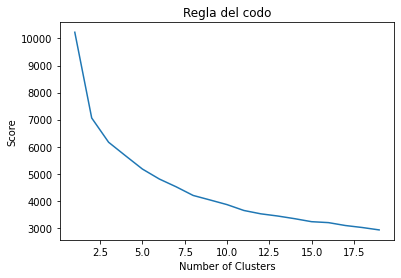

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(Z_train).inertia_ for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Regla del codo')
plt.show()

## **K-medoids**

In [ ]:
#pip install scikit-learn-extra
#conda install -c conda-forge scikit-learn-extra

In [ ]:
from sklearn_extra.cluster import KMedoids

In [ ]:
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(Z_train)

In [ ]:
y_pred_medoids = kmedoids.predict(Z_test)

In [ ]:
print("accuracy train",round(accuracy_score(y_train,kmedoids.predict(Z_train)),3))
print("accuracy test",round(accuracy_score(y_test, y_pred_medoids),3))

accuracy train 0.941
accuracy test 0.899


In [ ]:
confusion_matrix(y_test, y_pred_medoids)

array([[ 69,  14],
       [  9, 136]])

# **Scatter plot**

Para graficar los puntos y colorear por cluster podemos utilizar PCA y plotear las dos primeras componentes principales. 

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)
df_fit = pca.fit(X_train)
pca_train = df_fit.transform(X_train)
pca_train = pd.DataFrame(pca_train)
pca_train.columns = ['P1', 'P2']

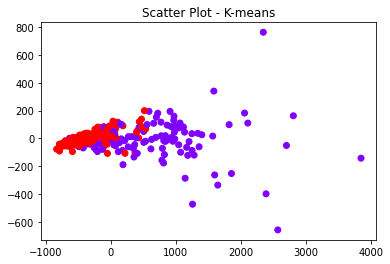

In [ ]:
plt.scatter(pca_train['P1'], pca_train['P2'], c = kmeans.predict(Z_train), cmap ='rainbow')
plt.title("Scatter Plot - K-means")
plt.show() 